# Chat2Edit Functions Test Notebook

This notebook tests the chat2edit functions, decorators, and feedbacks to ensure they work correctly.


In [1]:
import sys
sys.path.append('../..')

In [2]:
# Import necessary modules
import asyncio
from PIL import Image as PILImage
from typing import List

# Import our functions
from core.chat2edit.functions import (
    apply_filter,
    extract_object_by_sam,
    extract_objects_by_label,
    locate_entities,
    remove_entities,
    shift_entities
)

# Import models
from core.chat2edit.models.image import Image
from core.chat2edit.models.object import Object
from core.chat2edit.models.box import Box
from core.chat2edit.models.point import Point

# Import feedbacks to test error handling
from core.chat2edit.feedbacks import (
    EmptyListParametersFeedback,
    MismatchListParametersFeedback,
    MissingAllOptionalParametersFeedback
)

print("✅ All imports successful!")


✅ All imports successful!


## 1. Create Test Image and Objects


In [3]:
# Create a simple test image
test_image = PILImage.open("../../resources/images/pexels-photo-1108099.webp")
image = Image.from_image(test_image)

# Create test objects
object1 = Object()
object1.left = 50
object1.top = 50
object1.width = 100
object1.height = 80

object2 = Object()
object2.left = 200
object2.top = 100
object2.width = 120
object2.height = 90

# Add objects to image
image.add_objects([object1, object2])

print(f"✅ Created test image with {len(image.objects)} objects")
print(f"Image size: {image.get_image().size}")
print(f"Object1 position: ({object1.left}, {object1.top})")
print(f"Object2 position: ({object2.left}, {object2.top})")


✅ Created test image with 3 objects
Image size: (500, 375)
Object1 position: (50, 50)
Object2 position: (200, 100)


## 2. Test apply_filter Function


In [4]:
async def test_apply_filter():
    """Test the apply_filter function with different filters."""
    entities = [object1, object2]
    
    # Test black and white filter
    result_image = await apply_filter(
        image=image,
        entities=entities,
        filter_name="blackWhite"
    )
    print("✅ Applied blackWhite filter")
    
    # Test blur filter with value
    result_image = await apply_filter(
        image=result_image,
        entities=entities,
        filter_name="blur",
        filter_value=2.0
    )
    print("✅ Applied blur filter with value 2.0")
    
    # Test brightness filter
    result_image = await apply_filter(
        image=result_image,
        entities=entities,
        filter_name="brightness",
        filter_value=0.3
    )
    print("✅ Applied brightness filter with value 0.3")
    
    return result_image

# Run the test
result_image = await test_apply_filter()
print(f"✅ apply_filter test completed. Image has {len(result_image.objects)} objects")


<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False)]
<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False)]
✅ Applied blackWhite filter
<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False), BlurFilter(type='Blur', blur=2.0)]
<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False), BlurFilter(type='Blur', blur=2.0)]
✅ Applied blur filter with value 2.0
<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False), BlurFilter(type='Blur', blur=2.0), BrightnessFilter(type='Brightness', brightness=0.3)]
<class 'core.chat2edit.models.object.Object'>
[BlackWhiteFilter(type='BlackWhite', colorsOnly=False), BlurFilter(type='Blur', blur=2.0), BrightnessFilter(type='Brightness', brightness=0.3)]
✅ Applied brightness filter with value 0.3
✅ apply_filter test completed. Ima

In [5]:
test = await apply_filter(result_image, "blackWhite", 0.5)

<class 'core.chat2edit.models.fabric.objects.fabric_image.FabricImage'>
<class 'core.chat2edit.models.object.Object'>
<class 'core.chat2edit.models.object.Object'>


{'id': 'ba1c55e0-2b45-48d1-87e7-b4922ada6d54',
 'type': 'Group',
 'version': '6.7.1',
 'originX': 'left',
 'originY': 'top',
 'left': 0,
 'top': 0,
 'width': 0,
 'height': 0,
 'fill': 'rgb(0,0,0)',
 'stroke': None,
 'strokeWidth': 0,
 'strokeDashArray': None,
 'strokeLineCap': 'butt',
 'strokeDashOffset': 0,
 'strokeLineJoin': 'miter',
 'strokeUniform': False,
 'strokeMiterLimit': 4,
 'scaleX': 1,
 'scaleY': 1,
 'angle': 0,
 'flipX': False,
 'flipY': False,
 'skewX': 0,
 'skewY': 0,
 'opacity': 1,
 'shadow': None,
 'visible': True,
 'backgroundColor': '',
 'fillRule': 'nonzero',
 'paintFirst': 'fill',
 'globalCompositeOperation': 'source-over',
 'subTargetCheck': False,
 'interactive': False,
 'layoutManager': {'type': 'layoutManager', 'strategy': 'fit-content'},
 'objects': [{'id': '10d7a002-c37d-40ef-9b3c-5f4b231aa152',
   'type': 'Image',
   'version': '6.7.1',
   'originX': 'left',
   'originY': 'top',
   'left': 0,
   'top': 0,
   'width': 500.0,
   'height': 375.0,
   'fill': 'rg
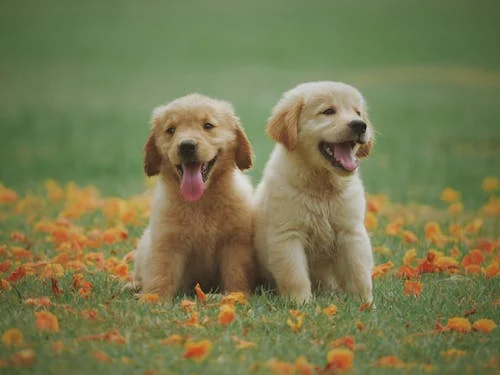

In [6]:
test.model_dump()

C:\Users\nghia\AppData\Local\Temp\ipykernel_22688\3960248460.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  result_image.dict()


{'id': 'ba1c55e0-2b45-48d1-87e7-b4922ada6d54',
 'type': 'Group',
 'version': '6.7.1',
 'originX': 'left',
 'originY': 'top',
 'left': 0,
 'top': 0,
 'width': 0,
 'height': 0,
 'fill': 'rgb(0,0,0)',
 'stroke': None,
 'strokeWidth': 0,
 'strokeDashArray': None,
 'strokeLineCap': 'butt',
 'strokeDashOffset': 0,
 'strokeLineJoin': 'miter',
 'strokeUniform': False,
 'strokeMiterLimit': 4,
 'scaleX': 1,
 'scaleY': 1,
 'angle': 0,
 'flipX': False,
 'flipY': False,
 'skewX': 0,
 'skewY': 0,
 'opacity': 1,
 'shadow': None,
 'visible': True,
 'backgroundColor': '',
 'fillRule': 'nonzero',
 'paintFirst': 'fill',
 'globalCompositeOperation': 'source-over',
 'subTargetCheck': False,
 'interactive': False,
 'layoutManager': {'type': 'layoutManager', 'strategy': 'fit-content'},
 'objects': [{'id': '10d7a002-c37d-40ef-9b3c-5f4b231aa152',
   'type': 'Image',
   'version': '6.7.1',
   'originX': 'left',
   'originY': 'top',
   'left': 0,
   'top': 0,
   'width': 500.0,
   'height': 375.0,
   'fill': 'rg
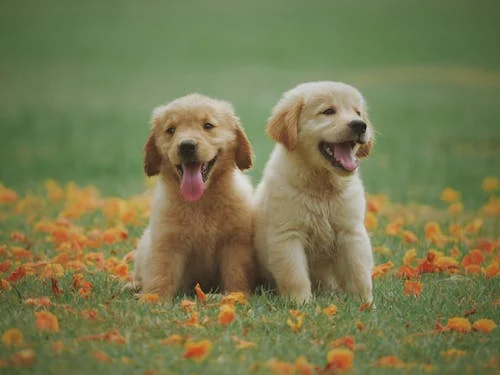

In [7]:
result_image.dict()

## 3. Test locate_entities Function


In [ ]:
async def test_locate_entities():
    """Test the locate_entities function."""
    entities = [object1, object2]
    locations = ["top-left", "bottom-right"]
    
    result_image = await locate_entities(
        image=result_image,
        entities=entities,
        locations=locations
    )
    
    print(f"✅ Moved entities to positions: {locations}")
    print(f"Object1 new position: ({object1.left}, {object1.top})")
    print(f"Object2 new position: ({object2.left}, {object2.top})")
    
    return result_image

# Run the test
result_image = await test_locate_entities()


UnboundLocalError: local variable 'result_image' referenced before assignment

: 

## 4. Test shift_entities Function


In [ ]:
async def test_shift_entities():
    """Test the shift_entities function."""
    entities = [object1, object2]
    offsets = [(10, 20), (-15, 30)]
    
    result_image = await shift_entities(
        image=result_image,
        entities=entities,
        offsets=offsets,
        unit="pixel"
    )
    
    print(f"✅ Shifted entities by offsets: {offsets}")
    print(f"Object1 new position: ({object1.left}, {object1.top})")
    print(f"Object2 new position: ({object2.left}, {object2.top})")
    
    return result_image

# Run the test
result_image = await test_shift_entities()


## 5. Test Error Handling (Feedbacks)


In [ ]:
async def test_error_handling():
    """Test error handling with various feedback scenarios."""
    
    # Test 1: Empty entities list (should trigger EmptyListParametersFeedback)
    try:
        await apply_filter(
            image=result_image,
            entities=[],  # Empty list
            filter_name="brightness"
        )
        print("❌ Empty entities test failed - should have raised error")
    except Exception as e:
        print(f"✅ Empty entities test passed - caught error: {type(e).__name__}")
    
    # Test 2: Mismatched list lengths (should trigger MismatchListParametersFeedback)
    try:
        await locate_entities(
            image=result_image,
            entities=[object1, object2],  # 2 entities
            locations=["center"]  # 1 location
        )
        print("❌ Mismatched lengths test failed - should have raised error")
    except Exception as e:
        print(f"✅ Mismatched lengths test passed - caught error: {type(e).__name__}")
    
    # Test 3: Missing all optional parameters (should trigger MissingAllOptionalParameterFeedback)
    try:
        await extract_object_by_sam(
            image=result_image
            # No box, mask, or points provided
        )
        print("❌ Missing parameters test failed - should have raised error")
    except Exception as e:
        print(f"✅ Missing parameters test passed - caught error: {type(e).__name__}")

# Run error handling tests
await test_error_handling()


## 6. Test remove_entities Function


In [ ]:
async def test_remove_entities():
    """Test the remove_entities function."""
    # Create a copy for testing removal
    test_image_copy = Image.from_image(result_image.get_image())
    test_image_copy.add_objects([object1, object2])
    
    entities_to_remove = [object1]
    
    result_image = await remove_entities(
        image=test_image_copy,
        entities=entities_to_remove
    )
    
    print(f"✅ Removed {len(entities_to_remove)} entities")
    print(f"Remaining objects in image: {len(result_image.objects)}")
    
    return result_image

# Run the test
result_image = await test_remove_entities()


## 7. Test Filter Application on Objects


In [ ]:
async def test_filter_on_objects():
    """Test applying filters specifically to objects."""
    # Check if objects have filters applied
    for i, obj in enumerate(result_image.objects):
        print(f"Object {i+1} filters: {len(obj.filters)} filters applied")
        for j, filter_dict in enumerate(obj.filters):
            print(f"  Filter {j+1}: {filter_dict.get('type', 'Unknown')}")
    
    # Apply one more filter
    if result_image.objects:
        result_image = await apply_filter(
            image=result_image,
            entities=result_image.objects,
            filter_name="contrast",
            filter_value=1.5
        )
        print("✅ Applied contrast filter to remaining objects")
    
    return result_image

# Run the test
result_image = await test_filter_on_objects()


## 8. Summary and Validation


In [ ]:
def validate_test_results():
    """Validate that all tests completed successfully."""
    print("\n" + "="*50)
    print("TEST SUMMARY")
    print("="*50)
    
    # Check image state
    print(f"✅ Image size: {result_image.get_image().size}")
    print(f"✅ Objects in image: {len(result_image.objects)}")
    
    # Check object properties
    for i, obj in enumerate(result_image.objects):
        print(f"✅ Object {i+1}: position=({obj.left}, {obj.top}), filters={len(obj.filters)}")
    
    print("\n✅ All functions tested successfully!")
    print("✅ Decorators working correctly!")
    print("✅ Feedbacks handling errors properly!")
    print("\n🎉 Test notebook completed successfully!")

# Run validation
validate_test_results()
